In [2]:
import pandas as pd

# Load the pickle file
df = pd.read_pickle('Game_BIF_FCN_Score_1_1_Day_2024-11-10Z.pkl')

# Save to CSV
df.to_csv('output.csv', index=False)  # index=False to avoid saving row numbers
#hello

FileNotFoundError: [Errno 2] No such file or directory: 'Game_BIF_FCN_Score_1_1_Day_2024-11-10Z.pkl'

In [2]:
df.head()
#print(df.iloc[0,2])


,Times,Ball,FCN,Opp
0,"[0.0, 1]","[-0.08, 0.21, 0.53, 2.08, 1, 0]","[[-12.58, -19.2, 0.0, 0.0, 2.0], [-3.08, 21.55...","[[43.21, 0.05, 0.0, 0.0, 1.0], [12.15, 18.5, 0..."
1,"[0.04, 1]","[-0.13, 0.23, 0.53, 2.01, 1, 0]","[[-12.57, -19.23, 0.0, 0.33, 2.0], [-3.08, 21....","[[43.22, 0.05, 0.0, 0.11, 1.0], [12.16, 18.49,..."
2,"[0.08, 1]","[-0.23, 0.24, 0.53, 1.8900000000000001, 1, 0]","[[-12.56, -19.25, 0.0, 0.66, 2.0], [-3.08, 21....","[[43.23, 0.04, 0.0, 0.21, 1.0], [12.17, 18.48,..."
3,"[0.12, 1]","[-0.31, 0.25, 0.53, 1.77, 0, 1]","[[-12.55, -19.28, 0.0, 0.6000000000000001, 2.0...","[[43.23, 0.04, 0.0, 0.22, 1.0], [12.18, 18.47,..."
4,"[0.16, 1]","[-0.39, 0.26, 0.52, 1.65, 0, 1]","[[-12.55, -19.3, 0.0, 0.56, 2.0], [-3.08, 21.5...","[[43.24, 0.03, 0.0, 0.2, 1.0], [12.19, 18.45, ..."


In [3]:
ball_expanded = pd.DataFrame(df['Ball'].tolist(), columns=[f'Ball_{i}' for i in range(len(df['Ball'].iloc[0]))])# Expand 'Ball' column (e.g., 6 values) into Ball_0, Ball_1, ..., Ball_5
df = pd.concat([df.drop(columns='Ball'), ball_expanded], axis=1)

n_players = len(df['FCN'].iloc[0])
n_features = len(df['FCN'].iloc[0][0])  # e.g., [x, y, vx, vy, team]


fcn_flat = df['FCN'].apply(lambda team: [item for player in team for item in player]) #replacing fcn column with the x,y,z and other coords of each player in FCN
fcn_df = pd.DataFrame(fcn_flat.tolist(),
                      columns=[f'FCN_p{p}_f{f}' for p in range(n_players) for f in range(n_features)])


opp_flat = df['Opp'].apply(lambda team: [item for player in team for item in player]) #same for opp
opp_df = pd.DataFrame(opp_flat.tolist(),
                      columns=[f'Opp_p{p}_f{f}' for p in range(n_players) for f in range(n_features)])


df = pd.concat([df.drop(columns=['FCN', 'Opp']), fcn_df, opp_df], axis=1)
df

,Times,Ball_0,Ball_1,Ball_2,Ball_3,Ball_4,Ball_5,FCN_p0_f0,FCN_p0_f1,FCN_p0_f2,...,Opp_p9_f0,Opp_p9_f1,Opp_p9_f2,Opp_p9_f3,Opp_p9_f4,Opp_p10_f0,Opp_p10_f1,Opp_p10_f2,Opp_p10_f3,Opp_p10_f4
0,"[0.0, 1]",-0.08,0.21,0.53,2.08,1,0,-12.58,-19.20,0.0,...,0.66,9.55,0.0,0.00,36.0,10.66,-19.10,0.0,0.00,37.0
1,"[0.04, 1]",-0.13,0.23,0.53,2.01,1,0,-12.57,-19.23,0.0,...,0.65,9.55,0.0,0.03,36.0,10.64,-19.11,0.0,0.22,37.0
2,"[0.08, 1]",-0.23,0.24,0.53,1.89,1,0,-12.56,-19.25,0.0,...,0.65,9.55,0.0,0.05,36.0,10.63,-19.12,0.0,0.43,37.0
3,"[0.12, 1]",-0.31,0.25,0.53,1.77,0,1,-12.55,-19.28,0.0,...,0.65,9.55,0.0,0.00,36.0,10.62,-19.13,0.0,0.38,37.0
4,"[0.16, 1]",-0.39,0.26,0.52,1.65,0,1,-12.55,-19.30,0.0,...,0.65,9.55,0.0,0.00,36.0,10.60,-19.14,0.0,0.41,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147854,"[5613.68, 2]",-13.97,3.80,0.83,9.15,0,1,1.98,9.54,0.0,...,23.11,21.45,0.0,4.91,36.0,20.85,1.63,0.0,4.15,37.0
147855,"[5613.719999999999, 2]",-14.26,3.68,0.88,9.06,0,1,1.84,9.47,0.0,...,22.92,21.50,0.0,4.81,36.0,20.69,1.59,0.0,4.17,37.0
147856,"[5613.76, 2]",-14.53,3.57,0.93,8.99,0,1,1.71,9.41,0.0,...,22.74,21.55,0.0,4.77,36.0,20.52,1.55,0.0,4.18,37.0
147857,"[5613.8, 2]",-14.85,3.43,0.98,8.90,0,0,1.58,9.35,0.0,...,22.55,21.59,0.0,0.00,36.0,20.36,1.52,0.0,0.00,37.0


In [13]:
list_of_columns = df.columns.tolist()
list_of_columns

['Times',
 'Ball_0',
 'Ball_1',
 'Ball_2',
 'Ball_3',
 'Ball_4',
 'Ball_5',
 'FCN_p0_f0',
 'FCN_p0_f1',
 'FCN_p0_f2',
 'FCN_p0_f3',
 'FCN_p0_f4',
 'FCN_p1_f0',
 'FCN_p1_f1',
 'FCN_p1_f2',
 'FCN_p1_f3',
 'FCN_p1_f4',
 'FCN_p2_f0',
 'FCN_p2_f1',
 'FCN_p2_f2',
 'FCN_p2_f3',
 'FCN_p2_f4',
 'FCN_p3_f0',
 'FCN_p3_f1',
 'FCN_p3_f2',
 'FCN_p3_f3',
 'FCN_p3_f4',
 'FCN_p4_f0',
 'FCN_p4_f1',
 'FCN_p4_f2',
 'FCN_p4_f3',
 'FCN_p4_f4',
 'FCN_p5_f0',
 'FCN_p5_f1',
 'FCN_p5_f2',
 'FCN_p5_f3',
 'FCN_p5_f4',
 'FCN_p6_f0',
 'FCN_p6_f1',
 'FCN_p6_f2',
 'FCN_p6_f3',
 'FCN_p6_f4',
 'FCN_p7_f0',
 'FCN_p7_f1',
 'FCN_p7_f2',
 'FCN_p7_f3',
 'FCN_p7_f4',
 'FCN_p8_f0',
 'FCN_p8_f1',
 'FCN_p8_f2',
 'FCN_p8_f3',
 'FCN_p8_f4',
 'FCN_p9_f0',
 'FCN_p9_f1',
 'FCN_p9_f2',
 'FCN_p9_f3',
 'FCN_p9_f4',
 'FCN_p10_f0',
 'FCN_p10_f1',
 'FCN_p10_f2',
 'FCN_p10_f3',
 'FCN_p10_f4',
 'Opp_p0_f0',
 'Opp_p0_f1',
 'Opp_p0_f2',
 'Opp_p0_f3',
 'Opp_p0_f4',
 'Opp_p1_f0',
 'Opp_p1_f1',
 'Opp_p1_f2',
 'Opp_p1_f3',
 'Opp_p1_f4',
 'Opp_p2_

In [19]:
df['TimeFloat'] = df['Times'].apply(lambda x: x[0])

# Split at 3000.44
df_first_half = df[df['TimeFloat'] <= 3000.44].reset_index(drop=True)
df_second_half = df[df['TimeFloat'] > 3000.44].reset_index(drop=True)


df_first_half = df_first_half.drop(columns='TimeFloat')
df_second_half = df_second_half.drop(columns='TimeFloat')


In [15]:
#calculating the absolute distance of every player from the ball
import numpy as np

def distance_3d(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)


ball_cols = ['Ball_0', 'Ball_1', 'Ball_2']

#for fcn
for i in range(11):
    player_cols = [f'FCN_p{i}_f0', f'FCN_p{i}_f1', f'FCN_p{i}_f2']
    df[f'distance_FCN_p{i}'] = df.apply(lambda row: distance_3d(
        row[ball_cols[0]], row[ball_cols[1]], row[ball_cols[2]],
        row[player_cols[0]], row[player_cols[1]], row[player_cols[2]]
    ), axis=1)

#for opp
for i in range(11):
    player_cols = [f'Opp_p{i}_f0', f'Opp_p{i}_f1', f'Opp_p{i}_f2']
    df[f'distance_Opp_p{i}'] = df.apply(lambda row: distance_3d(
        row[ball_cols[0]], row[ball_cols[1]], row[ball_cols[2]],
        row[player_cols[0]], row[player_cols[1]], row[player_cols[2]]
    ), axis=1)



In [16]:
distance_cols = [col for col in df.columns if col.startswith('distance_')]
df['closest_player'] = df[distance_cols].idxmin(axis=1)
#df['closest_distance'] = df[distance_cols].min(axis=1)
closest_df = df[['Times', 'closest_player']]



In [19]:
closest_df

,Times,closest_player
0,"[0.0, 1]",distance_FCN_p3
1,"[0.04, 1]",distance_FCN_p3
2,"[0.08, 1]",distance_FCN_p3
3,"[0.12, 1]",distance_FCN_p3
4,"[0.16, 1]",distance_FCN_p3
...,...,...
147854,"[5613.68, 2]",distance_FCN_p4
147855,"[5613.719999999999, 2]",distance_FCN_p4
147856,"[5613.76, 2]",distance_FCN_p4
147857,"[5613.8, 2]",distance_FCN_p4


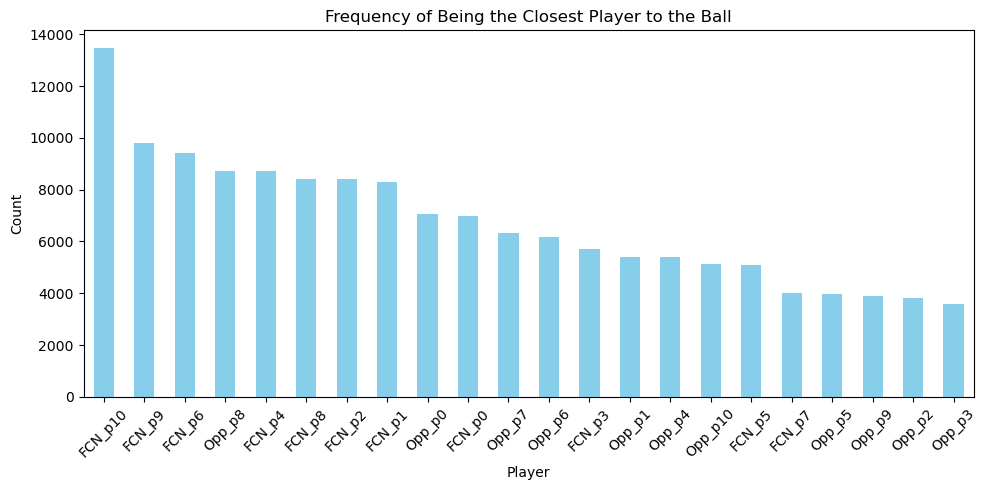

In [36]:
df['closest_player_clean'] = df['closest_player'].astype(str).str.replace('distance_', '', regex=False)

df['closest_player_clean'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Frequency of Being the Closest Player to the Ball")
plt.ylabel("Count")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


